In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_clean/layoffs_cleaned.csv')

In [3]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

In [4]:
df.shape

(2495, 9)

In [5]:
df['year'] = pd.to_datetime(df['date']).dt.year

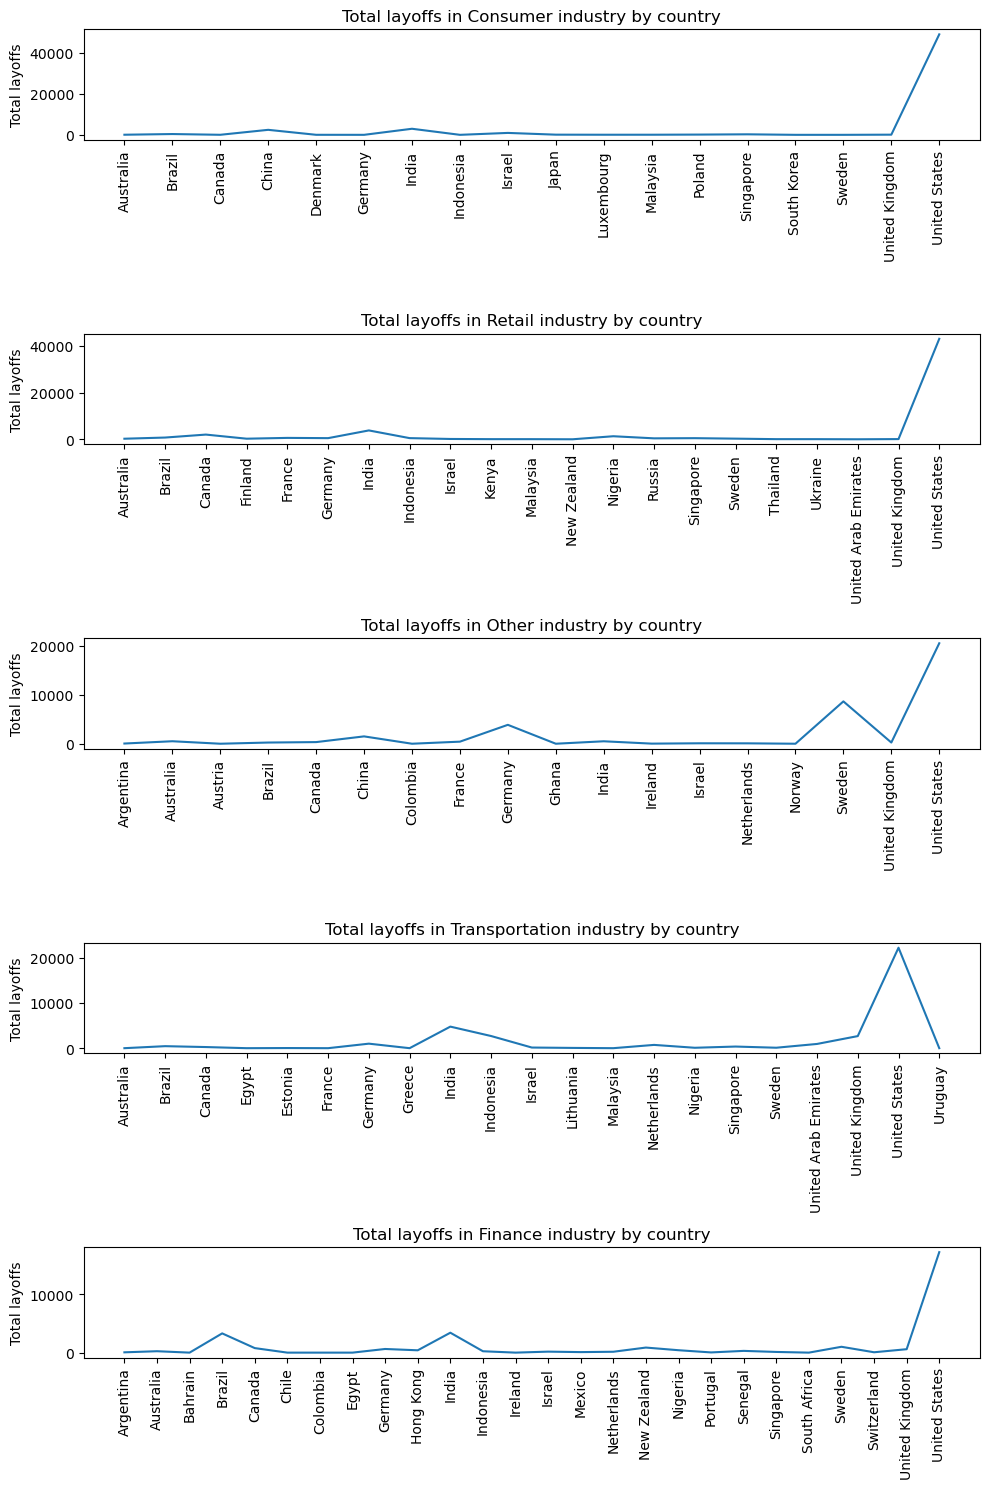

In [6]:

# Group the data by country and industry, and sum the total layoffs
grouped_data = df.groupby(['country', 'industry'])['total_laid_off'].sum().reset_index()

# Get the top 5 industries with the highest number of layoffs across all countries
top_industries = grouped_data.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter the data to include only the top 5 industries
grouped_data = grouped_data[grouped_data['industry'].isin(top_industries)]

# Create a line chart to visualize the total layoffs by country for each industry
plt.figure(figsize=(10, 15))
for i, industry in enumerate(top_industries):
    industry_data = grouped_data[grouped_data['industry'] == industry]
    plt.subplot(5, 1, i+1)
    plt.plot(industry_data['country'], industry_data['total_laid_off'])
    plt.title(f'Total layoffs in {industry} industry by country')
    plt.xticks(rotation=90)
    plt.ylabel('Total layoffs')
plt.tight_layout()
plt.show()

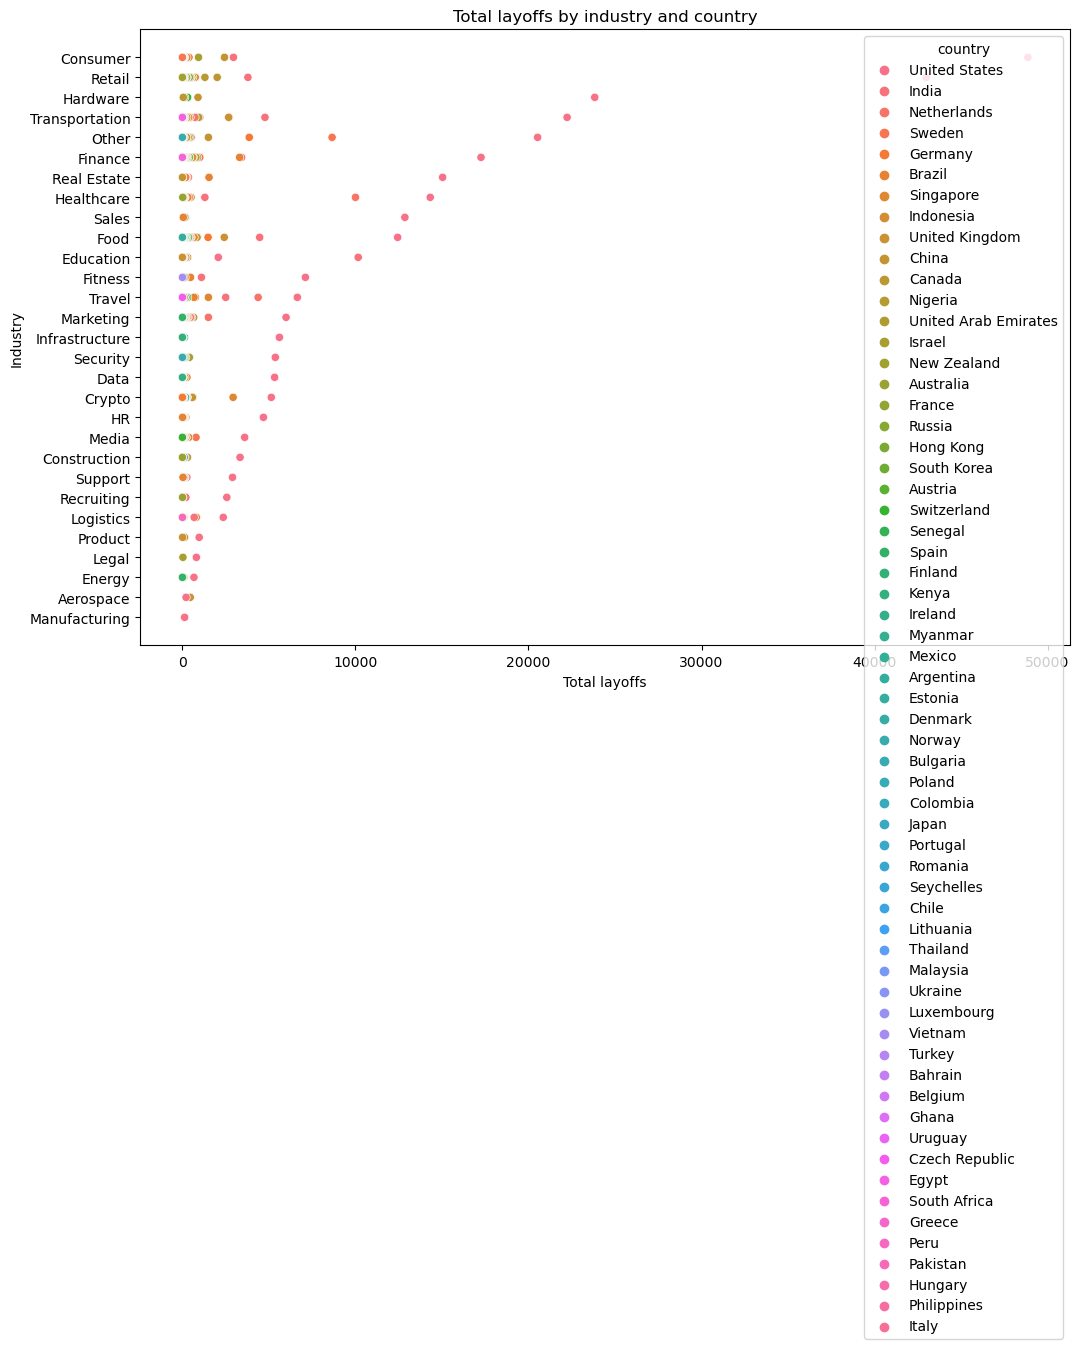

In [8]:
grouped_data = df.groupby(['industry', 'country'])['total_laid_off'].sum().reset_index()
#print(grouped_data.head())
# Sort the data by total layoffs in descending order
sorted_data = grouped_data.sort_values('total_laid_off', ascending=False)
#print(sorted_data.head())
# Create a scatter plot to visualize the total layoffs by industry and country
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_laid_off', y='industry', hue='country', data=sorted_data)
plt.title('Total layoffs by industry and country')
plt.xlabel('Total layoffs')
plt.ylabel('Industry')
plt.show()
#This code will create a scatter plot where the x-axis shows the total layoffs by industry and the y-axis shows the industry names. The scatter plot points are colored based on the country. You can customize the plot further by changing the size of the plot, adjusting the sorting order, or using a different color palette.

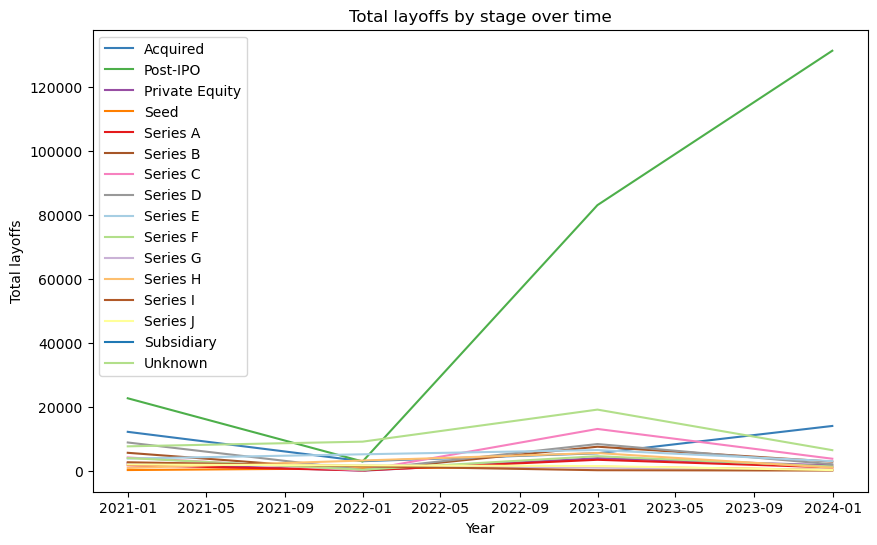

In [9]:
df['date'] = pd.to_datetime(df['date'])
colors = sns.color_palette(['#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#e41a1c', '#a65628', '#f781bf', '#999999', '#a6cee3', '#b2df8a','#cab2d6', '#fdbf6f', '#b15928', '#ffff99', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#fdbf6f', '#ff7f00'])
# Group the data by stage and year, and sum the total layoffs
grouped_data = df.groupby(['stage', pd.Grouper(key='date', freq='Y')])['total_laid_off'].sum().reset_index()
plt.figure(figsize=(10, 6))
# Create a line graph to visualize the total layoffs by stage over time
for i, stage in enumerate(grouped_data['stage'].unique()):
    stage_data = grouped_data[grouped_data['stage'] == stage]
    plt.plot(stage_data['date'], stage_data['total_laid_off'], color=colors[i], label=stage)
plt.title('Total layoffs by stage over time')
plt.xlabel('Year')
plt.ylabel('Total layoffs')
plt.legend()
plt.show()

In [10]:
layoffs_by_month = df.groupby(df['date'].dt.strftime('%Y-%m'))['company'].count()


In [11]:
layoffs_by_month = layoffs_by_month.loc['2020-03':]


In [12]:

percent_change = (layoffs_by_month - layoffs_by_month.shift(1)) / layoffs_by_month.shift(1) * 100


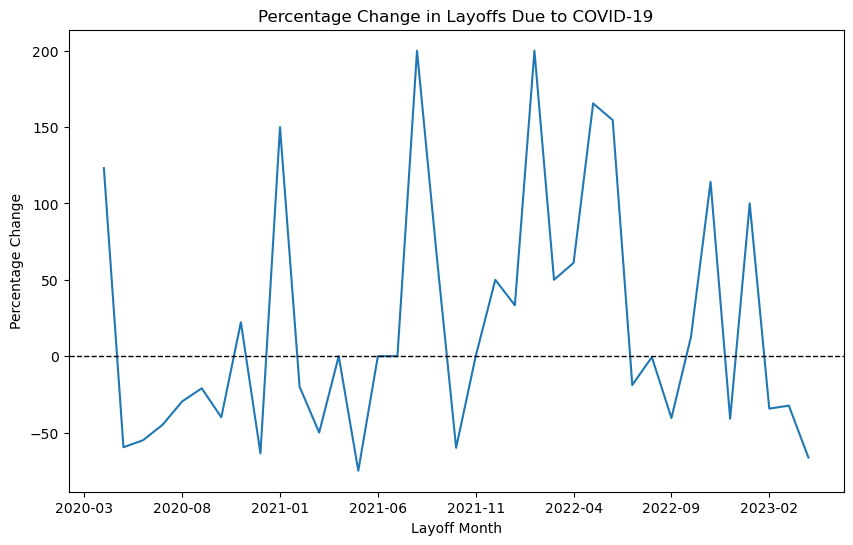

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
percent_change.plot(ax=ax)
# Add a horizontal line at y=0 to indicate the baseline (no change)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.set_title('Percentage Change in Layoffs Due to COVID-19')
ax.set_xlabel('Layoff Month')
ax.set_ylabel('Percentage Change')
# show the plot
plt.show()


In [14]:
# Get the top 10 locations with highest number of layoffs
top_locations = df['location'].value_counts().head(10)







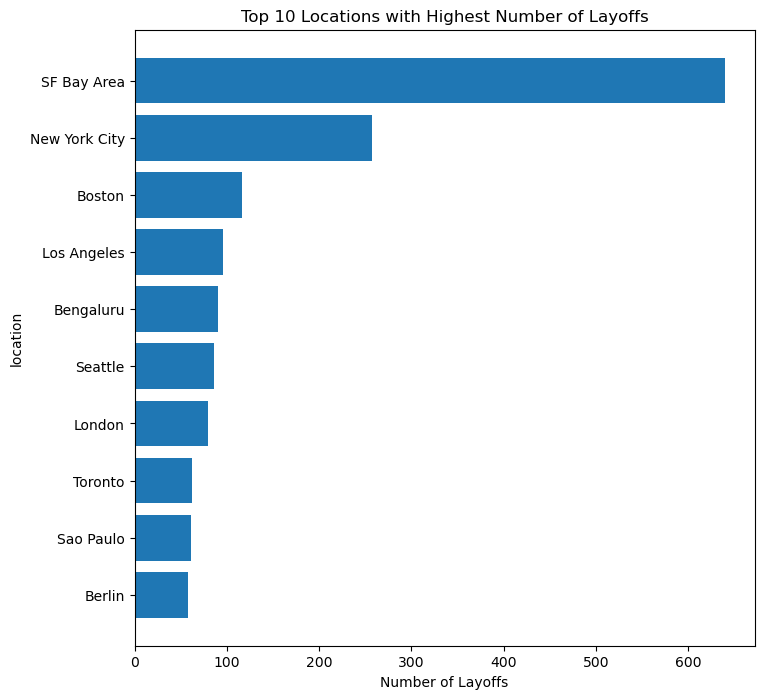

In [15]:

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,8))
ax.barh(top_locations.index, top_locations.values)

# Set x-axis label
ax.set_xlabel('Number of Layoffs')

# Set y-axis label
ax.set_ylabel('location')

# Set title
ax.set_title('Top 10 Locations with Highest Number of Layoffs')

# Invert the y-axis to show locations with highest number of layoffs on top
ax.invert_yaxis()

# Show the plot
plt.show()







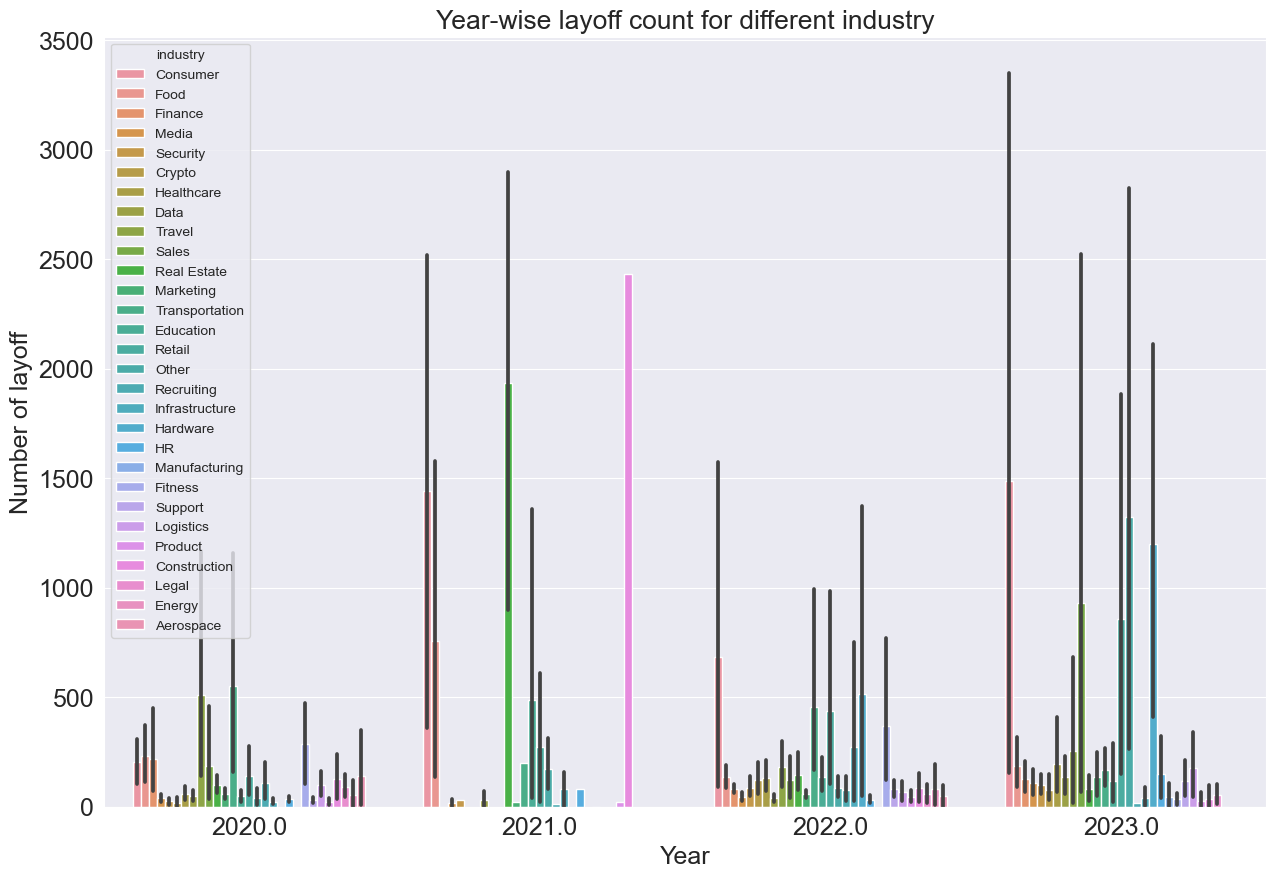

In [27]:
# Group the DataFrame by year and industry, and sum the numeric columns
ind_year_df = df.groupby(['year','industry']).sum(numeric_only=True)
# Reset the index, sort by year and total_laid_off in descending order, and set the index to year and industry
ind_year_df = ind_year_df.reset_index().sort_values(['year','total_laid_off'], ascending=[True,False]).set_index(['year','industry'])
# Initialize an empty DataFrame called industry_year
industry_year = pd.concat([ind_year_df, df])
for y in [2020,2021,2022,2023]:
    d = pd.DataFrame()
    d = ind_year_df.loc[y].reset_index().head(3)
    d = d.assign(year=y)
    industry_year = pd.concat([industry_year, d], ignore_index=True)
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='total_laid_off', hue='industry', data=industry_year)
plt.title('Year-wise layoff count for different industry',size=19)
plt.xlabel('Year',size=18)
plt.ylabel('Number of layoff',size=18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [26]:
# Create a scatter plot using Plotly Express, where the x-axis is 'funds_raised', the y-axis is 'total_laid_off', and the points are colored by 'stage'
fig = px.scatter(df, y="total_laid_off", x= "funds_raised", color='stage')
fig.update_traces(marker_size=10)
fig.show()

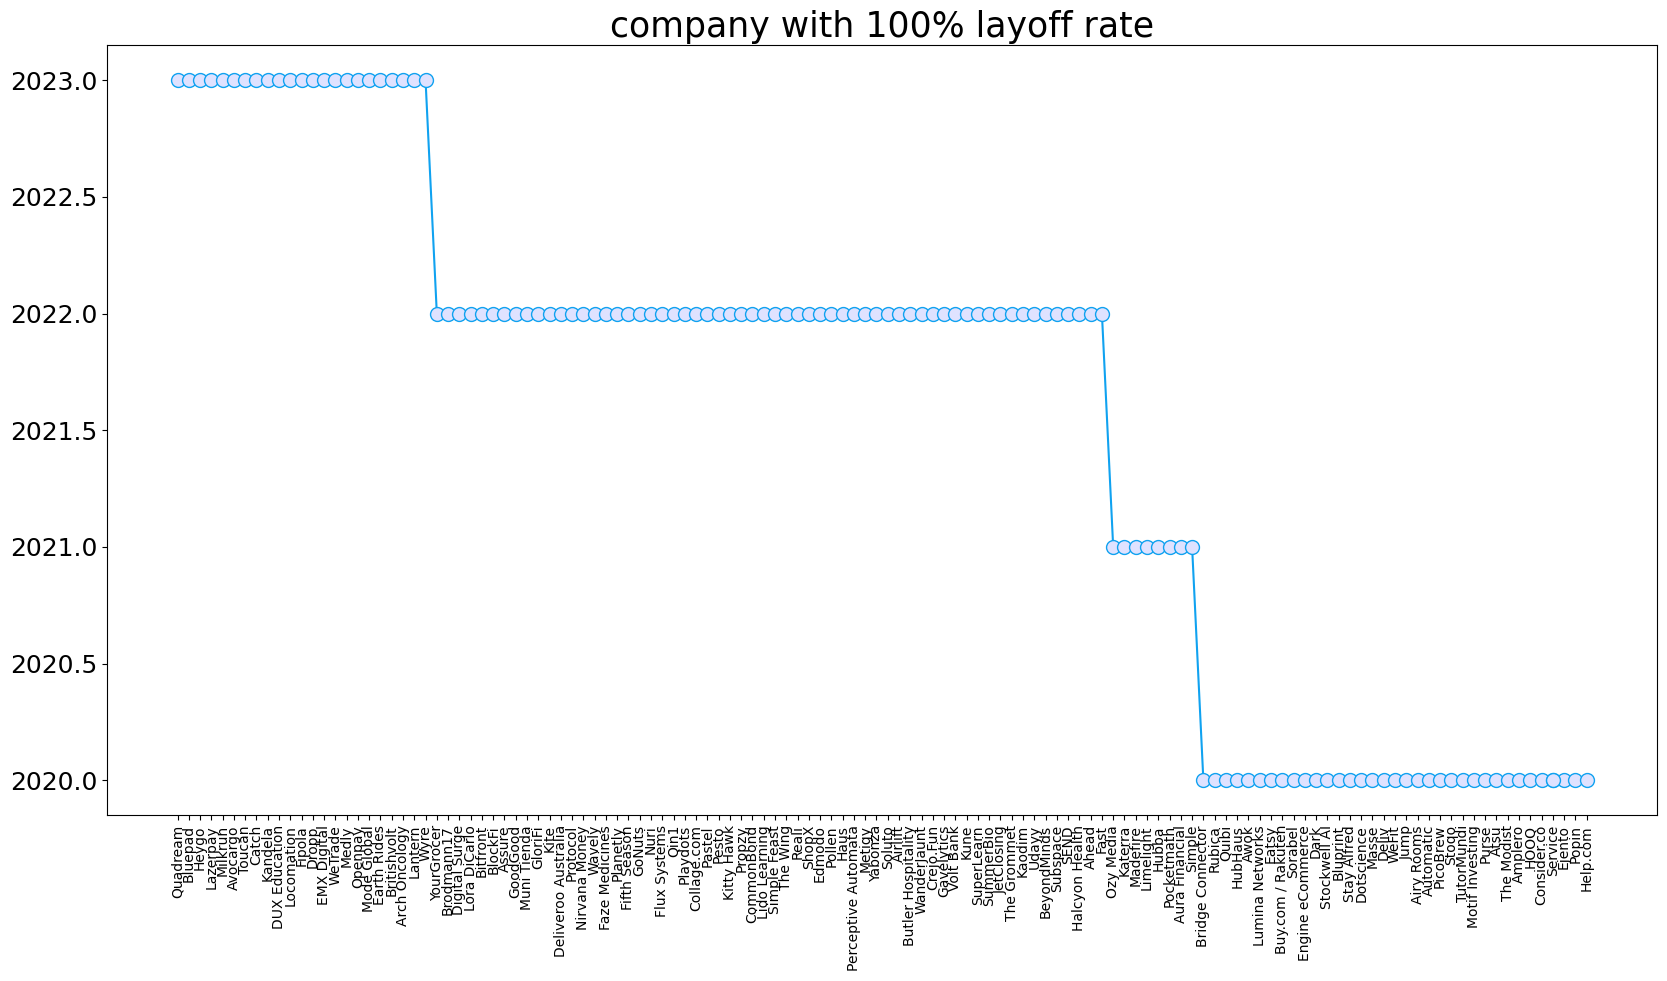

In [20]:
insight_1 = df.loc[df['percentage_laid_off'] == 1.00].dropna()
insight_1.head()

plt.figure(figsize=(20,10))
plt.plot(insight_1['company'], insight_1['year'], marker="o", color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=10)
plt.title("company with 100% layoff rate", fontsize=25)
plt.xticks(rotation = 90,fontsize = 10)
plt.yticks(fontsize = 18)
plt.show()

In [21]:
fig = px.box(df, x='stage', y='percentage_laid_off', 
             title='Percentage of Employees Laid Off by Stage of the Company')
fig.show()

In [22]:
fig = px.scatter(df, x='industry', y='percentage_laid_off', color='funds_raised',
                 title='Percentage of Employees Laid Off by Industry and Funds Raised')
fig.show()